In [1]:
import pytrends
import pandas as pd
import os
import pycountry
import trends_helpers
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets.embed import embed_minimal_html


Looking at keywords downloaded from 2005-2022.
- English
- Up to 2 origin languages

In [2]:
english_from_topics = pd.read_csv("data/semantic_keywordsfromtopics_trends_EN.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
ol_from_topics = pd.read_csv("data/semantic_keywordsfromtopics_trends_orig_lang.csv").drop(columns=["Unnamed: 0"]).drop_duplicates()
english_boss = pd.read_csv("data/semantic_keywords_boss_trends_EN.csv").drop_duplicates().drop(columns=["Unnamed: 0"])
ol_boss = pd.read_csv("data/semantic_keywords_boss_trends_OL.csv").drop_duplicates()
print(english_from_topics.shape)
print(ol_from_topics.shape)
print(english_boss.shape)
print(ol_boss.shape)

C:\Users\danid\AppData\Local\Temp\ipykernel_14824\24510774.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  english_boss = pd.read_csv("data/semantic_keywords_boss_trends_EN.csv").drop_duplicates().drop(columns=["Unnamed: 0"])


(21816, 22)
(39096, 22)
(41256, 42)
(38549, 41)


In [3]:
ol_boss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38549 entries, 0 to 38548
Data columns (total 41 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   date                                                           38549 non-null  object 
 1   asylum                                                         27716 non-null  float64
 2   citizenship+citizenships                                       30373 non-null  float64
 3   work visa                                                      24586 non-null  float64
 4   dual citizenship                                               25785 non-null  float64
 5   embassy+embassies                                              12094 non-null  float64
 6   nan                                                            37901 non-null  float64
 7   immigrate+immigrated                                      

In [4]:
# english_boss.info() # A bunch of missing dates - idk what happened there!

# We can't do much without dates so I'm dropping them - will have to check if it's worth re-downloading this 

english_boss = english_boss[english_boss.date.isnull()==False].drop(columns=["index"])

english_boss.info()


<class 'pandas.core.frame.DataFrame'>
Index: 12096 entries, 0 to 41255
Data columns (total 41 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   date                                                           12096 non-null  object 
 1   asylum                                                         9720 non-null   float64
 2   citizen                                                        11448 non-null  float64
 3   citizenship+citizenships                                       8856 non-null   float64
 4   consulate+consulates                                           7344 non-null   float64
 5   crises+crisis                                                  10368 non-null  float64
 6   diaspora                                                       10584 non-null  float64
 7   embassy+embassies                                              

In [5]:
ol_from_topics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39096 entries, 0 to 39311
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              39096 non-null  object 
 1   passport          30456 non-null  float64
 2   Immigration       30672 non-null  float64
 3   War               38448 non-null  float64
 4   Crisis            34992 non-null  float64
 5   Civilian          31752 non-null  float64
 6   Currency          35856 non-null  float64
 7   Lottery           33480 non-null  float64
 8   Economy           35424 non-null  float64
 9   Coup d’état       18360 non-null  float64
 10  Government        36936 non-null  float64
 11  country           38880 non-null  object 
 12  Conflict          32832 non-null  float64
 13  Violence          33048 non-null  float64
 14  Genocide          22896 non-null  float64
 15  Armed Forces      20088 non-null  float64
 16  Protest           27432 non-null  float64
 17

In [6]:
english_from_topics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21816 entries, 0 to 21815
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              21816 non-null  object 
 1   passport          20952 non-null  float64
 2   Immigration       21168 non-null  float64
 3   Travel Visa       16200 non-null  float64
 4   Refugee           18360 non-null  float64
 5   Conflict          20304 non-null  float64
 6   War               21600 non-null  float64
 7   Violence          20952 non-null  float64
 8   Crisis            20952 non-null  float64
 9   Militia           17496 non-null  float64
 10  Genocide          19872 non-null  float64
 11  Armed Forces      12528 non-null  float64
 12  Civilian          14256 non-null  float64
 13  Currency          21600 non-null  float64
 14  Lottery           21384 non-null  float64
 15  Economy           20736 non-null  float64
 16  Wage              18792 non-null  float64
 17

## Dimensionality reduction

### Merging OL

I downloaded data for a maximum of two origin languages. This might not be the best approach, but for now, I'm averaging the values when I have more than one OL.

In [7]:
ol_from_topics_av = ol_from_topics.groupby(['country', 'date']).mean().reset_index()
ol_boss_av = ol_boss.groupby(['country', 'date']).mean().reset_index()
# Print the transformed dataset
print(ol_from_topics_av.shape)
print(ol_boss_av.shape)


(30240, 22)
(27216, 41)


### I want a 'big merge' version to contrast against the reducted version

In [8]:
# Let's merge first english and OL separately

english = pd.merge(english_from_topics, english_boss, on=["date", "country"], how="outer")
ol = pd.merge(ol_from_topics_av, ol_boss_av, on=["date", "country"], how="outer")
print(english.shape)
print(ol.shape)

(24408, 61)
(30240, 61)


In [9]:
# Get the keywords listed 
keywords = english.columns[~english.columns.isin(['country', 'date'])]
print(keywords)


Index(['passport', 'Immigration', 'Travel Visa', 'Refugee', 'Conflict', 'War',
       'Violence', 'Crisis', 'Militia', 'Genocide', 'Armed Forces', 'Civilian',
       'Currency', 'Lottery', 'Economy', 'Wage', 'Protest', 'Government',
       'Bureau de change', 'Coup d’état', 'asylum', 'citizen',
       'citizenship+citizenships', 'consulate+consulates', 'crises+crisis',
       'diaspora', 'embassy+embassies', 'emigration', 'foreigner+foreigners',
       'immigrant+immigrants', 'migrate', 'migration',
       'nationality+nationalities', 'recruitment+recruitments',
       'refugee+refugees', 'repatriation', 'Schengen', 'student visa',
       'visa free', 'visa+visas', 'work visa', 'emigrant+emigrants',
       'devaluation', 'immigrate+immigrated',
       'legalization+legalisation+legalisations+legalizations',
       'naturalization+naturalisation+naturalisations+naturalizations',
       'recession+recessions', 'smuggler+smugglers+smuggling',
       'deportation+deportations+deported', 'd

In [10]:
# Create a mapping dictionary for renaming the columns
rename_dict_ol = {var: f"{var}_ol" for var in keywords}
rename_dict_en = {var: f"{var}_en" for var in keywords}

# Rename the columns using the mapping dictionary

english_wide = english.copy()
ol_wide = ol.copy()

english_wide.rename(columns=rename_dict_en, inplace=True)
ol_wide.rename(columns=rename_dict_ol, inplace=True)

In [11]:
big_merge = pd.merge(english_wide, ol_wide, on=["country", "date"], how="outer")
print(big_merge.shape)
print(big_merge.columns)

(37800, 120)
Index(['date', 'passport_en', 'Immigration_en', 'Travel Visa_en', 'Refugee_en',
       'Conflict_en', 'War_en', 'Violence_en', 'Crisis_en', 'Militia_en',
       ...
       'emigrant+emigrants_ol', 'migrate_ol', 'refugee+refugees_ol',
       'emigrate+emigrated_ol', 'bureau of immigration_ol',
       'foreigner+foreigners_ol', 'nationalization+nationalisation_ol',
       'asylum seeker_ol', 'border controls+border control_ol',
       'student visa_ol'],
      dtype='object', length=120)


### Cosine similarity to merge similar keywords and potentially get smoother results

In [12]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the list of words
word_vectors = vectorizer.fit_transform(keywords)

# Calculate the cosine similarity matrix
cosine_similarities = cosine_similarity(word_vectors)

# Create an empty list to store the results
results = []

# Iterate over the words and their cosine similarities
for i, word in enumerate(keywords):
    for j, other_word in enumerate(keywords):
        if i != j:
            similarity = cosine_similarities[i, j]
            results.append([word, other_word, similarity])

# Create a DataFrame from the results list
df_similarity = pd.DataFrame(results, columns=['Word 1', 'Word 2', 'Cosine Similarity'])

# Set the cosine similarity threshold
similarity_threshold = 0.4

# Create an empty list to store the column pairs and groups
column_pairs = []
column_groups = []

# Iterate over the rows in df_similarity
for _, row in df_similarity.iterrows():
    word1 = row['Word 1']
    word2 = row['Word 2']
    similarity = row['Cosine Similarity']
    
    if similarity > similarity_threshold:
        found = False
        for group in column_groups:
            if word1 in group or word2 in group:
                group.add(word1)
                group.add(word2)
                found = True
                break
        if not found:
            column_groups.append({word1, word2})

# Combine overlapping groups
merged_groups = []
for group in column_groups:
    merged = False
    for merged_group in merged_groups:
        if len(group.intersection(merged_group)) > 0:
            merged_group.update(group)
            merged = True
            break
    if not merged:
        merged_groups.append(group)

# Convert groups to list
column_groups = [list(group) for group in merged_groups]

# Print the column groups
for group in column_groups:
    print(group)



['Immigration', 'bureau of immigration']
['student visa', 'Travel Visa', 'visa+visas', 'work visa', 'visa free']
['political asylum', 'Refugee', 'political refugee', 'asylum seeker', 'refugee+refugees', 'asylum']
['Crisis', 'crises+crisis']
['dual citizenship', 'nationality+nationalities', 'citizenship+citizenships', 'dual nationality']


In [13]:
# Create a new DataFrame to store the averaged columns
cos_av_en = english[['country', 'date']].copy()
cos_av_ol = ol[['country', 'date']].copy()


# Iterate over the column pairs
for g in column_groups:
    selected_columns = [col for col in english.columns if any(word in col for word in g)]
    new_column_name = g[0] + '_related'
    cos_av_en[new_column_name] = english[selected_columns].mean(axis=1)
    cos_av_ol[new_column_name] = ol[selected_columns].mean(axis=1)

print(cos_av_en.shape)
print(cos_av_ol.shape)

(24408, 7)
(30240, 7)


In [14]:
keywords_reduc = cos_av_en.columns[~cos_av_en.columns.isin(['country', 'date'])]
keywords_reduc # This are the final keywords

Index(['Immigration_related', 'student visa_related',
       'political asylum_related', 'Crisis_related',
       'dual citizenship_related'],
      dtype='object')

## Merging OL and English

Now, I merge everything in the same dataset. I want to keep track of english words vs OL words, to assess performance separately.

In [15]:
# Create a mapping dictionary for renaming the columns
rename_dict_ol = {var: f"{var}_ol" for var in keywords_reduc}
rename_dict_en = {var: f"{var}_en" for var in keywords_reduc}

# Rename the columns using the mapping dictionary

cos_av_en.rename(columns=rename_dict_en, inplace=True)
cos_av_ol.rename(columns=rename_dict_ol, inplace=True)

In [16]:
combined_wide = pd.merge(cos_av_en, cos_av_ol, on=["country", "date"], how="outer")
print(combined_wide.shape)
print(combined_wide.columns)

(37800, 12)
Index(['country', 'date', 'Immigration_related_en', 'student visa_related_en',
       'political asylum_related_en', 'Crisis_related_en',
       'dual citizenship_related_en', 'Immigration_related_ol',
       'student visa_related_ol', 'political asylum_related_ol',
       'Crisis_related_ol', 'dual citizenship_related_ol'],
      dtype='object')


Visualizing missing values:

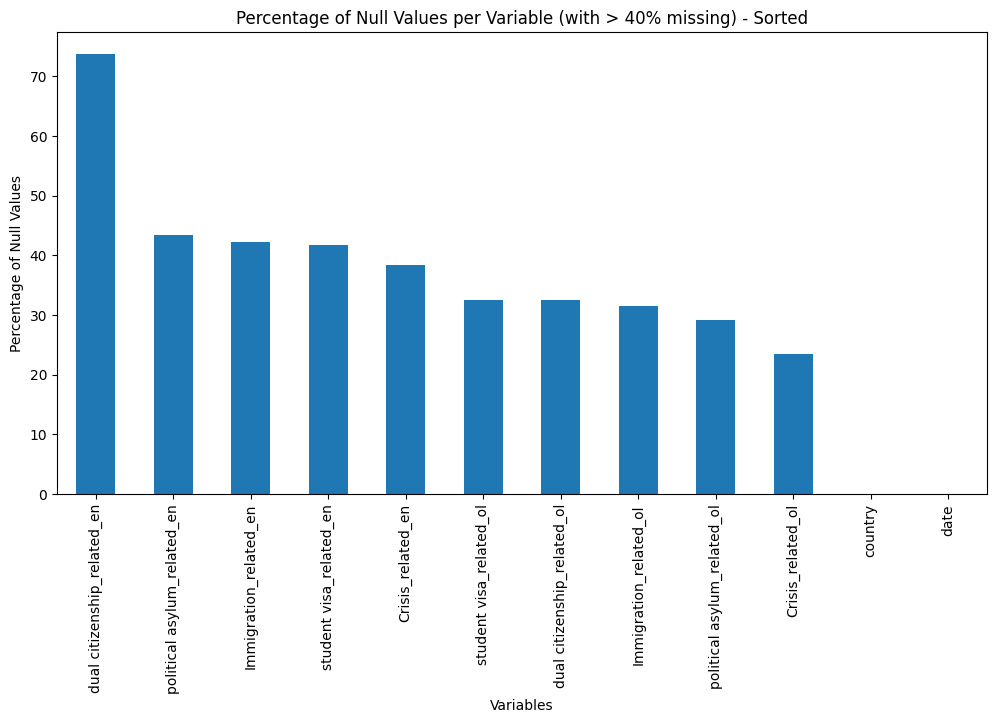

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is called 'df'

# Calculate the percentages of null values per variable
null_percentages = combined_wide.isnull().mean() * 100

# Sort variables by percentage of null values
sorted_null_percentages = null_percentages.sort_values(ascending=False)

# Plot the percentages of null values for sorted variables
plt.figure(figsize=(12, 6))
sorted_null_percentages.plot(kind='bar')
plt.xlabel('Variables')
plt.ylabel('Percentage of Null Values')
plt.title('Percentage of Null Values per Variable (with > 40% missing) - Sorted')
plt.xticks(rotation=90)
plt.show()



This missing values matrix is a bit tricky to interpret, as each row at the moment represents a particular date. We actually have to do this analysis per month and country specifically. However, we see that in general english words have more missing values. This mean no word from the group was found.

### Testing against RF forecasting + gtrends

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [19]:
countries = combined_wide['country'].unique().tolist()

In [20]:
import pycountry

# Define a function to convert ISO2 to ISO3
def convert_iso2_to_iso3(iso2_code):
    try:
        country = pycountry.countries.get(alpha_2=iso2_code)
        return country.alpha_3
    except AttributeError:
        # ISO2 code not found
        return 'N/A'

# Convert ISO2 to ISO3
iso3_codes = [convert_iso2_to_iso3(code) for code in countries]

+ Current baseline RF for outflows, without text data

In [21]:
def multi_shift(df, shift_range, columns):
    shifted_data = []
    for shift_value in range(shift_range.start, shift_range.stop):
        shifted = df[columns].shift(shift_value)
        shifted_data.append(shifted)
    shifted_df = pd.concat(shifted_data, axis=1, keys=[f'Shift_{shift_value}' for shift_value in range(shift_range.start, shift_range.stop)])
    shifted_df.columns = [' '.join(col).strip() for col in shifted_df.columns.values]
    return pd.concat([df, shifted_df],axis=1).dropna()

In [22]:
import operator
def filter_multi_date(df,col,val, relate):
    ops = {'>': operator.gt,
        '<': operator.lt,
        '>=': operator.ge,
        '<=': operator.le,
        '==': operator.eq}
    col_index = pd.Series(df.index.names)[(pd.Series(df.index.names) == col)].index.tolist()[0]
    return ops[relate](df.index.get_level_values(col_index),  pd.to_datetime(val))

In [23]:
data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
       'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
        'typeOfViolence_o', 'best_est_o', 'Nyear_conflict_o', 'Nyear_log_o',
        'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

# data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
#       'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
#       'typeOfViolence_o', 'Nyear_conflict_o', 'Nyear_log_o',
#       'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

data_outflows = data_outflows[data_outflows["iso_o"].isin(iso3_codes)]

# preprocessing
data_outflows['year'] = pd.to_datetime(data_outflows['year'], format='%Y')
data_outflows = pd.concat([data_outflows.drop('newarrival',axis=1).groupby(['iso_o', 'year']).first(),data_outflows.groupby(['iso_o', 'year']).newarrival.sum()],axis=1)

In [24]:
# create lagged dataset
lagged_outflows = data_outflows.groupby('iso_o').apply(lambda x: multi_shift(x, range(1,5), ['newarrival','dead_o'])).reset_index(level=1,drop=True)
h1_outflows = lagged_outflows.groupby('iso_o').newarrival.shift(-1)

In [25]:
# Implement random forest
end_train = '2016-01-01'
end_val = '2016-01-01'

X_train = lagged_outflows[filter_multi_date(lagged_outflows, 'year',end_train,'<=')]
y_train = h1_outflows[filter_multi_date(h1_outflows, 'year',end_train,'<=')].dropna()

rf_outflow = RandomForestRegressor(n_jobs = -1, random_state=42)
rf_outflow.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [26]:
X_test = lagged_outflows[filter_multi_date(lagged_outflows, 'year',end_train,'>')]
X_test = X_test[filter_multi_date(X_test, 'year','2021','<')]
y_test = h1_outflows[filter_multi_date(h1_outflows,'year',end_train,'>')].dropna()
y_test = y_test[filter_multi_date(y_test, 'year','2021','<')]


In [27]:
y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
y_pred.index = X_test.index

In [28]:
mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)

105402.94360772525

In [29]:
def feature_imp(coef, names):
    imp = coef
    indexes = np.argsort(imp)[-11:]
    indexes = list(indexes)
    
    plt.barh(range(len(indexes)), imp[indexes], align='center')
    plt.yticks(range(len(indexes)), [names[i] for i in indexes])
    plt.show()
    
    return indexes

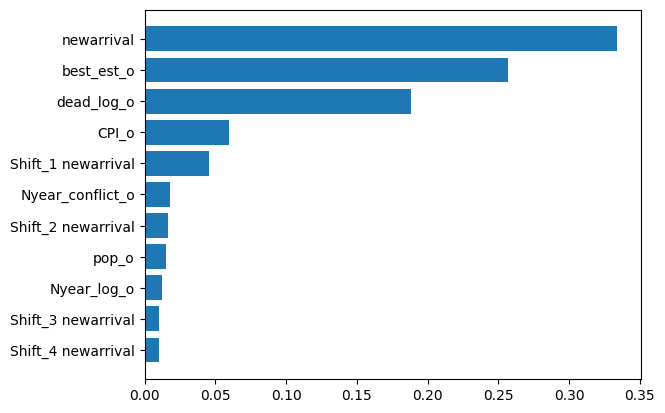

In [30]:
feature_names = X_train.columns
feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)

### GTRENDS data 

+ REDUCED VERSION

In [119]:
avg_trends = combined_wide.copy()
avg_trends["iso_o"] = avg_trends["country"].apply(lambda x: convert_iso2_to_iso3(x))
avg_trends.set_index('date', inplace=True)
avg_trends.index = pd.DatetimeIndex(avg_trends.index)
avg_trends = avg_trends.drop(columns=["country"])

# Group by 'iso_o' and resample by YEAR, then mean the values

avg_trends_1 = avg_trends.groupby(['iso_o', pd.Grouper(freq='Y')]).mean().reset_index()
avg_trends_1['year'] = avg_trends_1['date'].dt.year
avg_trends_1 = avg_trends_1.drop(columns=["date"])

# Taking max and min values

max_trends = avg_trends.groupby(['iso_o', pd.Grouper(freq='Y')]).max().reset_index()
max_trends['year'] = max_trends['date'].dt.year
max_trends = max_trends.drop(columns=["date"])

min_trends = avg_trends.groupby(['iso_o', pd.Grouper(freq='Y')]).min().reset_index()
min_trends['year'] = min_trends['date'].dt.year
min_trends = min_trends.drop(columns=["date"])


print(avg_trends_1.shape)
print(max_trends.shape)
print(min_trends.shape)

(3150, 12)
(3150, 12)
(3150, 12)


In [120]:
keywords_new = avg_trends_1.columns[~avg_trends_1.columns.isin(['iso_o', 'year'])]

# Create a mapping dictionary for renaming the columns
rename_dict_avg = {var: f"{var}_avg" for var in keywords_new}
rename_dict_min = {var: f"{var}_min" for var in keywords_new}
rename_dict_max = {var: f"{var}_max" for var in keywords_new}

avg_trends_1.rename(columns=rename_dict_avg, inplace=True)
max_trends.rename(columns=rename_dict_max, inplace=True)
min_trends.rename(columns=rename_dict_min, inplace=True)


In [121]:
avg_trends_1 = avg_trends_1.set_index(["iso_o", "year"])
max_trends = max_trends.set_index(["iso_o", "year"])
min_trends = min_trends.set_index(["iso_o", "year"])

In [122]:
data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
       'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
        'typeOfViolence_o', 'best_est_o', 'Nyear_conflict_o', 'Nyear_log_o',
        'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

# data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
#       'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
#       'typeOfViolence_o', 'Nyear_conflict_o', 'Nyear_log_o',
#       'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

data_outflows = data_outflows[data_outflows["iso_o"].isin(iso3_codes)]

data_outflows["year"] = pd.to_datetime(data_outflows["year"], format='%Y')
data_outflows["year"] = data_outflows["year"].dt.year


In [123]:
data_outflows = pd.concat([data_outflows.drop('newarrival',axis=1).groupby(['iso_o', 'year']).first(),data_outflows.groupby(['iso_o', 'year']).newarrival.sum()],axis=1)

In [124]:
# Merging trends with UNHCR data
data_merged = pd.merge(data_outflows, avg_trends_1, left_index=True, right_index=True, how='outer')
data_merged = pd.merge(data_merged, max_trends, left_index=True, right_index=True, how='outer')
data_merged = pd.merge(data_merged, min_trends, left_index=True, right_index=True, how='outer')
print(data_merged.shape)
data_merged.head()

(4347, 47)


pop_o  CPI_o  GDP_PP_o  GDP_PPP_o  island_o  area_o  landlocked_o   
iso_o year                                                                      
ABW   2000  0.091  3.544  36636.95      0.005       1.0   193.0           0.0  \
      2001  0.091  2.518  37813.88      0.006       1.0   193.0           0.0   
      2002  0.092  4.162  37198.23      0.005       1.0   193.0           0.0   
      2003  0.093  2.287  37185.65      0.005       1.0   193.0           0.0   
      2004  0.095  2.774  39054.94      0.005       1.0   193.0           0.0   

            PR_o  CL_o  typeOfViolence_o  ...  Immigration_related_en_min   
iso_o year                                ...                               
ABW   2000   4.0   3.0               0.0  ...                         NaN  \
      2001   5.0   4.0               0.0  ...                         NaN   
      2002   3.0   3.0               0.0  ...                         NaN   
      2003   3.0   2.0               0.0  ...                         NaN   
      2004   3.0   3.0               0.0  ...                         NaN   

            student visa_related_en_min  political asylum_related_en_min   
iso_o year                                                                 
ABW   2000                          NaN                              NaN  \
      2001                          NaN                              NaN   
      2002                          NaN                              NaN   
      2003                          NaN                              NaN   
      2004                          NaN                              NaN   

            Crisis_related_en_min  dual citizenship_related_en_min   
iso_o year                                                           
ABW   2000                    NaN                              NaN  \
      2001                    NaN                              NaN   
      2002                    NaN                              NaN   
      2003                    NaN                              NaN   
      2004                    NaN                              NaN   

            Immigration_related_ol_min  student visa_related_ol_min   
iso_o year                                                            
ABW   2000                         NaN                          NaN  \
      2001                         NaN                          NaN   
      2002                         NaN                          NaN   
      2003                         NaN                          NaN   
      2004                         NaN                          NaN   

            political asylum_related_ol_min  Crisis_related_ol_min   
iso_o year                                                           
ABW   2000                              NaN                    NaN  \
      2001                              NaN                    NaN   
      2002                              NaN                    NaN   
      2003                              NaN                    NaN   
      2004                              NaN                    NaN   

            dual citizenship_related_ol_min  
iso_o year                                   
ABW   2000                              NaN  
      2001                              NaN  
      2002                              NaN  
      2003                              NaN  
      2004                              NaN  

[5 rows x 47 columns]

In [125]:
data_merged.columns

Index(['pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o', 'island_o', 'area_o',
       'landlocked_o', 'PR_o', 'CL_o', 'typeOfViolence_o', 'best_est_o',
       'Nyear_conflict_o', 'Nyear_log_o', 'dead_log_o', 'Nyear_conf_o',
       'dead_o', 'newarrival', 'Immigration_related_en_avg',
       'student visa_related_en_avg', 'political asylum_related_en_avg',
       'Crisis_related_en_avg', 'dual citizenship_related_en_avg',
       'Immigration_related_ol_avg', 'student visa_related_ol_avg',
       'political asylum_related_ol_avg', 'Crisis_related_ol_avg',
       'dual citizenship_related_ol_avg', 'Immigration_related_en_max',
       'student visa_related_en_max', 'political asylum_related_en_max',
       'Crisis_related_en_max', 'dual citizenship_related_en_max',
       'Immigration_related_ol_max', 'student visa_related_ol_max',
       'political asylum_related_ol_max', 'Crisis_related_ol_max',
       'dual citizenship_related_ol_max', 'Immigration_related_en_min',
       'student visa_related

In [126]:
start_column = 'Immigration_related_en_avg'
end_column = 'dual citizenship_related_ol_min'

# Check if all variables starting from 'Refugee_related_en_avg' to 'bureau of immigration_related_ol_min' are NaN
data_merged['trends_not_available'] = data_merged.loc[:, start_column:end_column].isna().all(axis=1).astype(int)

data_merged["trends_not_available"].value_counts()


trends_not_available
0    3096
1    1251
Name: count, dtype: int64

In [127]:
# Fill the nans with 0s
data_merged = data_merged.fillna(0)

In [128]:
lagged_outflows = data_merged.groupby('iso_o').apply(lambda x: multi_shift(x, range(1,5), ['newarrival','dead_o'])).reset_index(level=1,drop=True)
h1_outflows = lagged_outflows.groupby('iso_o').newarrival.shift(-1)

In [129]:
h1_outflows

iso_o  year
ABW    2004      0.0
       2005      0.0
       2006      0.0
       2007      0.0
       2008      0.0
               ...  
ZWE    2020    640.0
       2021      0.0
       2022      0.0
       2023      0.0
       2024      NaN
Name: newarrival, Length: 3647, dtype: float64

In [130]:
# Implement random forest

X_train = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) <= 2016]
y_train = h1_outflows[h1_outflows.index.get_level_values(1) <= 2016].dropna()

rf_outflow = RandomForestRegressor(n_jobs = -1, random_state=42)
rf_outflow.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [131]:
X_test = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) > 2016]
X_test = X_test.loc[X_test.index.get_level_values(1) < 2021]
y_test = h1_outflows[h1_outflows.index.get_level_values(1) > 2016].dropna()
y_test = y_test[y_test.index.get_level_values(1) < 2021].dropna()


In [132]:
y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
y_pred.index = X_test.index

mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)


103704.92149640739

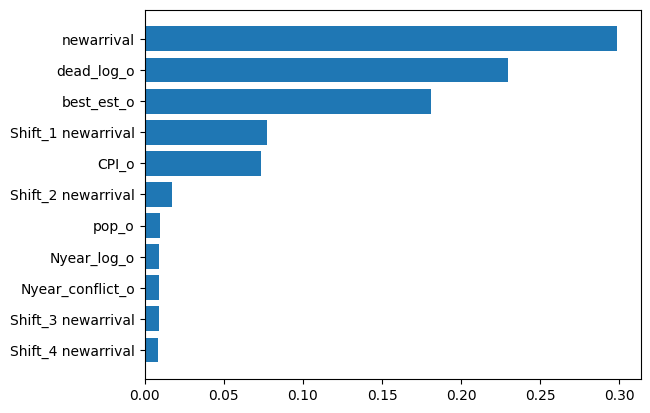

In [133]:
feature_names = X_train.columns
feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)

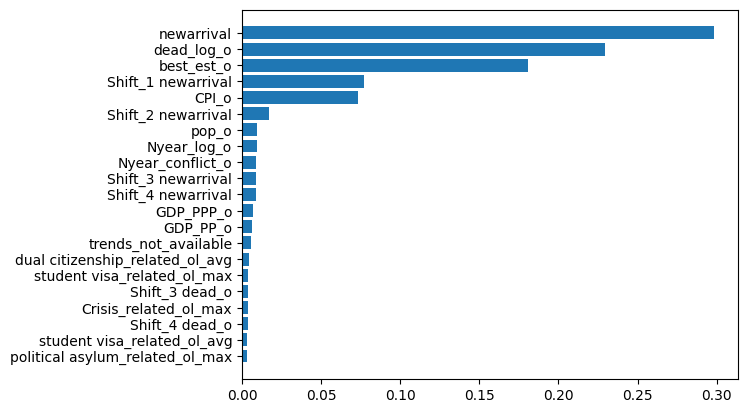

In [134]:
def feature_imp_more(coef, names):
    imp = coef
    indexes = np.argsort(imp)[-21:]
    indexes = list(indexes)
    
    plt.barh(range(len(indexes)), imp[indexes], align='center')
    plt.yticks(range(len(indexes)), [names[i] for i in indexes])
    plt.show()
    
    return indexes

feature_names = X_train.columns
feat_indexes = feature_imp_more(abs(rf_outflow.feature_importances_), feature_names)

Trends are not relevant feature

Taking just means (best results)

In [113]:
# Merging trends with UNHCR data
data_merged = pd.merge(data_outflows, avg_trends_1, left_index=True, right_index=True, how='outer')


In [114]:
data_merged.columns

Index(['pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o', 'island_o', 'area_o',
       'landlocked_o', 'PR_o', 'CL_o', 'typeOfViolence_o', 'best_est_o',
       'Nyear_conflict_o', 'Nyear_log_o', 'dead_log_o', 'Nyear_conf_o',
       'dead_o', 'newarrival', 'Immigration_related_en_avg',
       'student visa_related_en_avg', 'political asylum_related_en_avg',
       'Crisis_related_en_avg', 'dual citizenship_related_en_avg',
       'Immigration_related_ol_avg', 'student visa_related_ol_avg',
       'political asylum_related_ol_avg', 'Crisis_related_ol_avg',
       'dual citizenship_related_ol_avg'],
      dtype='object')

In [115]:
start_column = 'Immigration_related_en_avg'
end_column = 'dual citizenship_related_ol_avg'

# Check if all variables starting from 'Refugee_related_en_avg' to 'bureau of immigration_related_ol_min' are NaN
data_merged['trends_not_available'] = data_merged.loc[:, start_column:end_column].isna().all(axis=1).astype(int)

data_merged["trends_not_available"].value_counts()

# Fill the nans with 0s
data_merged = data_merged.fillna(0)

lagged_outflows = data_merged.groupby('iso_o').apply(lambda x: multi_shift(x, range(1,5), ['newarrival','dead_o'])).reset_index(level=1,drop=True)
h1_outflows = lagged_outflows.groupby('iso_o').newarrival.shift(-1)

In [116]:
# Implement random forest

X_train = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) <= 2016]
y_train = h1_outflows[h1_outflows.index.get_level_values(1) <= 2016].dropna()

rf_outflow = RandomForestRegressor(n_jobs = -1, random_state=42)
rf_outflow.fit(X_train, y_train)


X_test = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) > 2016]
X_test = X_test.loc[X_test.index.get_level_values(1) < 2021]
y_test = h1_outflows[h1_outflows.index.get_level_values(1) > 2016].dropna()
y_test = y_test[y_test.index.get_level_values(1) < 2021].dropna()

y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
y_pred.index = X_test.index

mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)

103386.11920369705

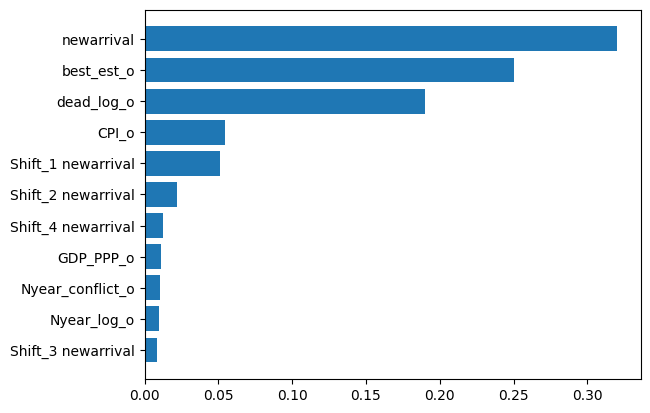

In [117]:
feature_names = X_train.columns
feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)

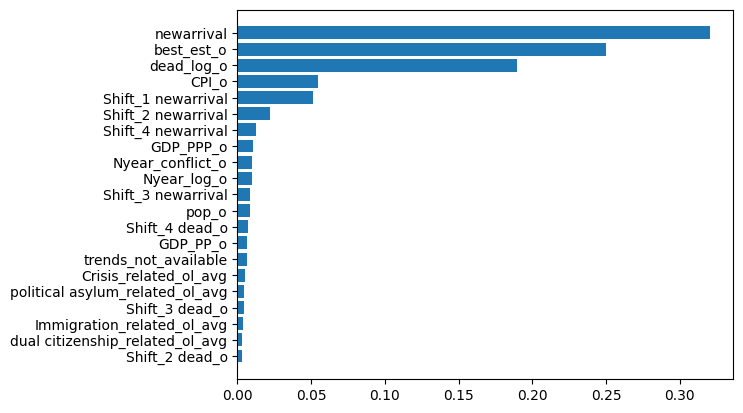

In [118]:
feat_indexes = feature_imp_more(abs(rf_outflow.feature_importances_), feature_names)

Now just working with max values

In [58]:
# Merging trends with UNHCR data
data_merged = pd.merge(data_outflows, max_trends, left_index=True, right_index=True, how='outer')

In [59]:
start_column = 'Immigration_related_en_max'
end_column = 'dual citizenship_related_ol_max'

# Check if all variables starting from 'Refugee_related_en_avg' to 'bureau of immigration_related_ol_min' are NaN
data_merged['trends_not_available'] = data_merged.loc[:, start_column:end_column].isna().all(axis=1).astype(int)

data_merged["trends_not_available"].value_counts()

# Fill the nans with 0s
data_merged = data_merged.fillna(0)

lagged_outflows = data_merged.groupby('iso_o').apply(lambda x: multi_shift(x, range(1,5), ['newarrival','dead_o'])).reset_index(level=1,drop=True)
h1_outflows = lagged_outflows.groupby('iso_o').newarrival.shift(-1)

In [60]:
# Implement random forest

X_train = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) <= 2016]
y_train = h1_outflows[h1_outflows.index.get_level_values(1) <= 2016].dropna()

rf_outflow = RandomForestRegressor(n_jobs = -1, random_state=42)
rf_outflow.fit(X_train, y_train)


X_test = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) > 2016]
X_test = X_test.loc[X_test.index.get_level_values(1) < 2021]
y_test = h1_outflows[h1_outflows.index.get_level_values(1) > 2016].dropna()
y_test = y_test[y_test.index.get_level_values(1) < 2021].dropna()

y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
y_pred.index = X_test.index

mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)

104636.82448041937

Mean + max

In [61]:
data_merged = pd.merge(data_outflows, avg_trends_1, left_index=True, right_index=True, how='outer')
data_merged = pd.merge(data_merged, max_trends, left_index=True, right_index=True, how='outer')

start_column = 'Immigration_related_en_avg'
end_column = 'dual citizenship_related_ol_max'

# Check if all variables starting from 'Refugee_related_en_avg' to 'bureau of immigration_related_ol_min' are NaN
data_merged['trends_not_available'] = data_merged.loc[:, start_column:end_column].isna().all(axis=1).astype(int)

data_merged["trends_not_available"].value_counts()

trends_not_available
0    3096
1    1251
Name: count, dtype: int64

In [62]:
# Implement random forest

X_train = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) <= 2016]
y_train = h1_outflows[h1_outflows.index.get_level_values(1) <= 2016].dropna()

rf_outflow = RandomForestRegressor(n_jobs = -1, random_state=42)
rf_outflow.fit(X_train, y_train)


X_test = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) > 2016]
X_test = X_test.loc[X_test.index.get_level_values(1) < 2021]
y_test = h1_outflows[h1_outflows.index.get_level_values(1) > 2016].dropna()
y_test = y_test[y_test.index.get_level_values(1) < 2021].dropna()

y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
y_pred.index = X_test.index

mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)

104636.82448041937

Best results: just means

Next steps: 
+ Compare using the complex version in the dataframe (no aggregation)
+ Different ways to impute nans
+ Smooth spikyness (Eric's function)
+ Include and process trends variables considering internet penetration / population levels (weights?)

+ NO AGGREGATION

In [63]:
data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
       'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
        'typeOfViolence_o', 'best_est_o', 'Nyear_conflict_o', 'Nyear_log_o',
        'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

# data_outflows = pd.read_csv('../../data/data.csv', engine='pyarrow').drop_duplicates(subset=['Id','year'])[['iso_o', 'year', 'pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o',
#       'island_o', 'area_o', 'landlocked_o', 'PR_o', 'CL_o',
#       'typeOfViolence_o', 'Nyear_conflict_o', 'Nyear_log_o',
#       'dead_log_o', 'Nyear_conf_o', 'dead_o', 'newarrival']]

data_outflows = data_outflows[data_outflows["iso_o"].isin(iso3_codes)]

data_outflows["year"] = pd.to_datetime(data_outflows["year"], format='%Y')
data_outflows["year"] = data_outflows["year"].dt.year

data_outflows = pd.concat([data_outflows.drop('newarrival',axis=1).groupby(['iso_o', 'year']).first(),data_outflows.groupby(['iso_o', 'year']).newarrival.sum()],axis=1)

In [64]:
avg_trends = big_merge.copy()
avg_trends["iso_o"] = avg_trends["country"].apply(lambda x: convert_iso2_to_iso3(x))
avg_trends.set_index('date', inplace=True)
avg_trends.index = pd.DatetimeIndex(avg_trends.index)
avg_trends = avg_trends.drop(columns=["country"])

# Group by 'iso_o' and resample by YEAR, then mean the values

avg_trends_1 = avg_trends.groupby(['iso_o', pd.Grouper(freq='Y')]).mean().reset_index()
avg_trends_1['year'] = avg_trends_1['date'].dt.year
avg_trends_1 = avg_trends_1.drop(columns=["date"])
avg_trends_1 = avg_trends_1.set_index(["iso_o", "year"])

In [65]:
# Merging trends with UNHCR data
data_merged = pd.merge(data_outflows, avg_trends_1, left_index=True, right_index=True, how='outer')
print(data_merged.shape)
data_merged.head()


(4347, 135)


pop_o  CPI_o  GDP_PP_o  GDP_PPP_o  island_o  area_o  landlocked_o   
iso_o year                                                                      
ABW   2000  0.091  3.544  36636.95      0.005       1.0   193.0           0.0  \
      2001  0.091  2.518  37813.88      0.006       1.0   193.0           0.0   
      2002  0.092  4.162  37198.23      0.005       1.0   193.0           0.0   
      2003  0.093  2.287  37185.65      0.005       1.0   193.0           0.0   
      2004  0.095  2.774  39054.94      0.005       1.0   193.0           0.0   

            PR_o  CL_o  typeOfViolence_o  ...  emigrant+emigrants_ol   
iso_o year                                ...                          
ABW   2000   4.0   3.0               0.0  ...                    NaN  \
      2001   5.0   4.0               0.0  ...                    NaN   
      2002   3.0   3.0               0.0  ...                    NaN   
      2003   3.0   2.0               0.0  ...                    NaN   
      2004   3.0   3.0               0.0  ...                    NaN   

            migrate_ol  refugee+refugees_ol  emigrate+emigrated_ol   
iso_o year                                                           
ABW   2000         NaN                  NaN                    NaN  \
      2001         NaN                  NaN                    NaN   
      2002         NaN                  NaN                    NaN   
      2003         NaN                  NaN                    NaN   
      2004         NaN                  NaN                    NaN   

            bureau of immigration_ol  foreigner+foreigners_ol   
iso_o year                                                      
ABW   2000                       NaN                      NaN  \
      2001                       NaN                      NaN   
      2002                       NaN                      NaN   
      2003                       NaN                      NaN   
      2004                       NaN                      NaN   

            nationalization+nationalisation_ol  asylum seeker_ol   
iso_o year                                                         
ABW   2000                                 NaN               NaN  \
      2001                                 NaN               NaN   
      2002                                 NaN               NaN   
      2003                                 NaN               NaN   
      2004                                 NaN               NaN   

            border controls+border control_ol  student visa_ol  
iso_o year                                                      
ABW   2000                                NaN              NaN  
      2001                                NaN              NaN  
      2002                                NaN              NaN  
      2003                                NaN              NaN  
      2004                                NaN              NaN  

[5 rows x 135 columns]

In [66]:
data_merged.columns

Index(['pop_o', 'CPI_o', 'GDP_PP_o', 'GDP_PPP_o', 'island_o', 'area_o',
       'landlocked_o', 'PR_o', 'CL_o', 'typeOfViolence_o',
       ...
       'emigrant+emigrants_ol', 'migrate_ol', 'refugee+refugees_ol',
       'emigrate+emigrated_ol', 'bureau of immigration_ol',
       'foreigner+foreigners_ol', 'nationalization+nationalisation_ol',
       'asylum seeker_ol', 'border controls+border control_ol',
       'student visa_ol'],
      dtype='object', length=135)

In [67]:
start_column = 'passport_en'
end_column = 'student visa_ol'

# Check if all variables starting from 'Refugee_related_en_avg' to 'bureau of immigration_related_ol_min' are NaN
data_merged['trends_not_available'] = data_merged.loc[:, start_column:end_column].isna().all(axis=1).astype(int)

data_merged["trends_not_available"].value_counts()



trends_not_available
0    3150
1    1197
Name: count, dtype: int64

In [68]:
# Fill the nans with 0s
data_merged = data_merged.fillna(0)


In [70]:
lagged_outflows = data_merged.groupby('iso_o').apply(lambda x: multi_shift(x, range(1,5), ['newarrival','dead_o'])).reset_index(level=1,drop=True)
h1_outflows = lagged_outflows.groupby('iso_o').newarrival.shift(-1)


# Implement random forest

X_train = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) <= 2016]
y_train = h1_outflows[h1_outflows.index.get_level_values(1) <= 2016].dropna()

rf_outflow = RandomForestRegressor(n_jobs = -1, random_state=42)
rf_outflow.fit(X_train, y_train)


X_test = lagged_outflows.loc[lagged_outflows.index.get_level_values(1) > 2016]
X_test = X_test.loc[X_test.index.get_level_values(1) < 2021]
y_test = h1_outflows[h1_outflows.index.get_level_values(1) > 2016].dropna()
y_test = y_test[y_test.index.get_level_values(1) < 2021].dropna()

y_pred = pd.Series(rf_outflow.predict(X_test), name='pred').to_frame()
y_pred.index = X_test.index

mean_squared_error(y_true=y_test, y_pred=y_pred.pred, squared=False)

100491.5418004971

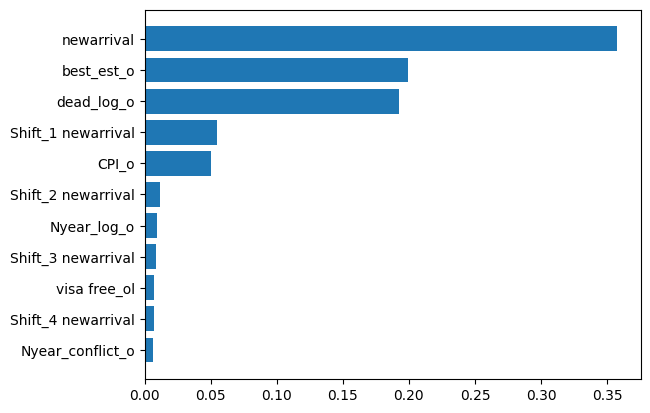

In [71]:
feature_names = X_train.columns
feat_indexes = feature_imp(abs(rf_outflow.feature_importances_), feature_names)

Best results: no dimensionality reduction

In [72]:
def feature_imp_more(coef, names):
    imp = coef
    indexes = np.argsort(imp)[-21:]
    indexes = list(indexes)
    
    plt.barh(range(len(indexes)), imp[indexes], align='center')
    plt.yticks(range(len(indexes)), [names[i] for i in indexes])
    plt.show()
    
    return indexes

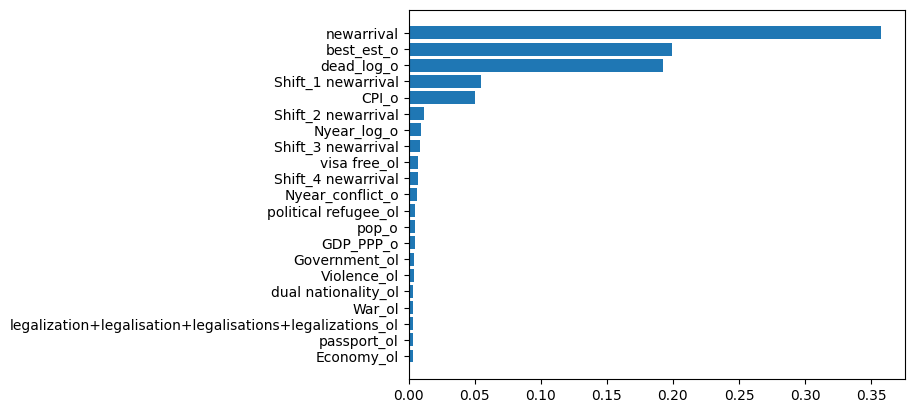

In [73]:
feat_indexes = feature_imp_more(abs(rf_outflow.feature_importances_), feature_names)